In [2]:
import importlib

import wrds
import pandas as pd
import datetime
import numpy as np
import pickle
from time import time, sleep
import argparse as ap
import sys
import csv
from dateutil.relativedelta import relativedelta
from collections import OrderedDict

db = wrds.Connection()

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


Enter your WRDS username [dan]:dflath19
Enter your password:········
WRDS recommends setting up a .pgpass file.
You can find more info here:
https://www.postgresql.org/docs/9.5/static/libpq-pgpass.html.
Loading library list...
Done


In [13]:
tic = 'TOL'
datadate = '2005-04-19'
q1 = ("select datadate,gvkey,prccd,tic "
            "from compm.secd "
           "where tic = '%s' and datadate <= '%s' ") % (tic,datadate)
df = db.raw_sql(q1)
df['m_avg'] = df.groupby('gvkey')['prccd'].apply(lambda x: x.ffill().rolling(window=200).sum()/200)

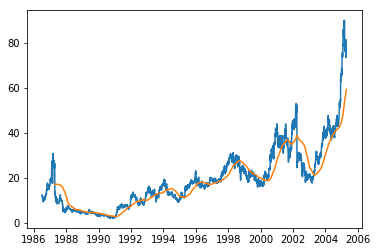

In [14]:
import matplotlib.pyplot as plt
plt.plot(df.datadate,df.prccd)
plt.plot(df.datadate,df.m_avg)
plt.show()

In [15]:
list(df.prccd)[-1]

75.5